# CPE 595 Homework 2 -Linear Regression and Logistic Regression


In [58]:
# Necessary Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Question 1. Hands-on Linear Regression

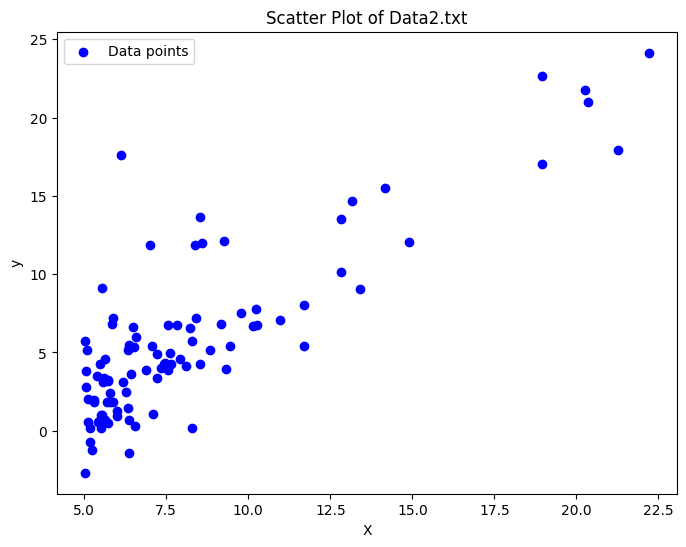

In [59]:
# Load Dataset
data = np.loadtxt('data2.txt', delimiter=',')  # Adjust path if needed
X = data[:, 0]  # Feature
y = data[:, 1]  # Target

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.title("Scatter Plot of Data2.txt")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


Intercept (w0): -3.8958
Slope (w1): 1.1930


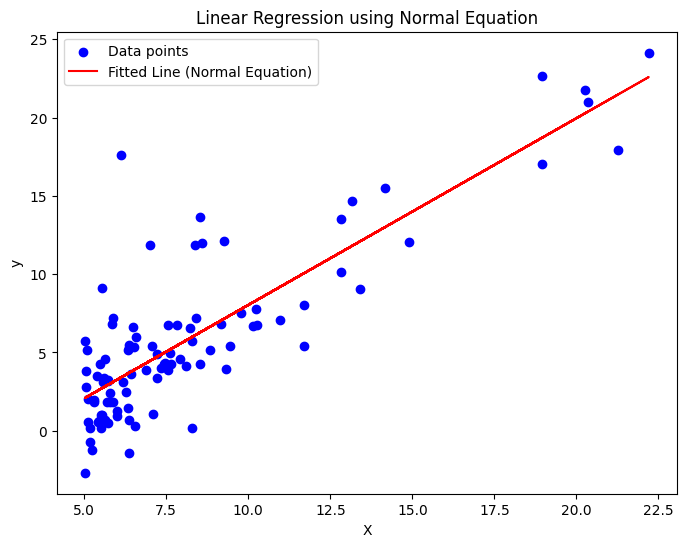

In [60]:
# Normal equation

# Add intercept term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term (intercept)

# Apply Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Display the coefficients
print(f"Intercept (w0): {theta_best[0]:.4f}")
print(f"Slope (w1): {theta_best[1]:.4f}")

# Plot the fitted line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, X_b.dot(theta_best), color='red', label='Fitted Line (Normal Equation)')
plt.title("Linear Regression using Normal Equation")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [61]:
# Split dataset between training and testing

# Shuffle and split the data
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

# Display shapes
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 77
Testing set size: 20


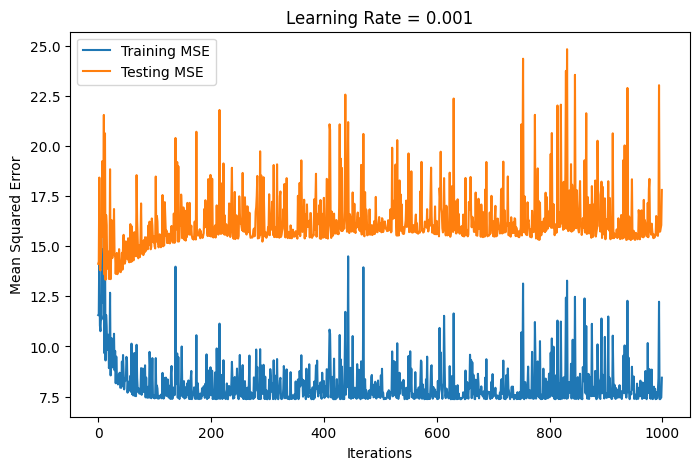

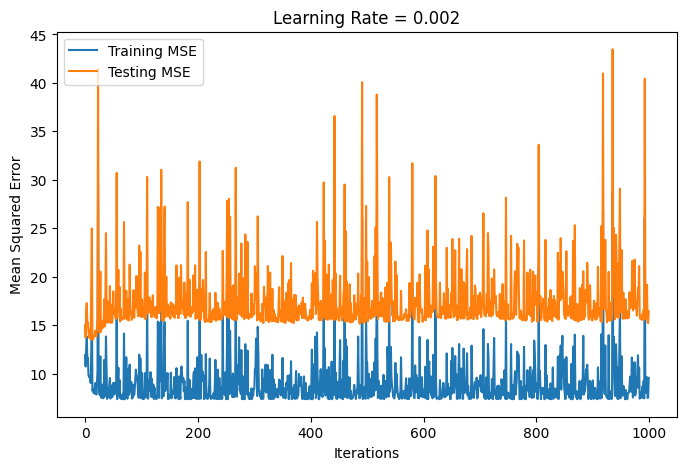

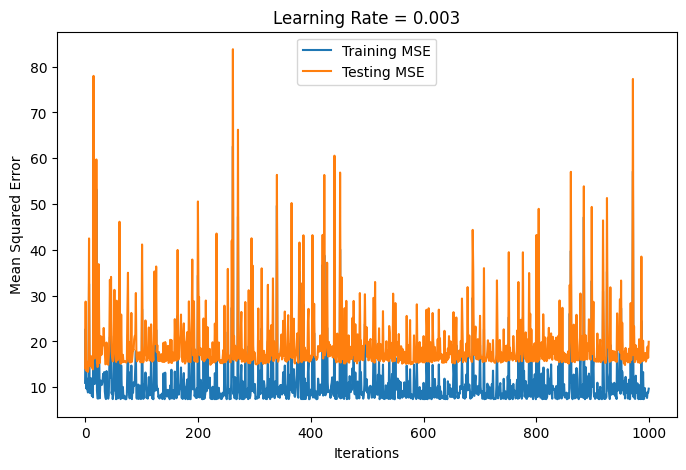

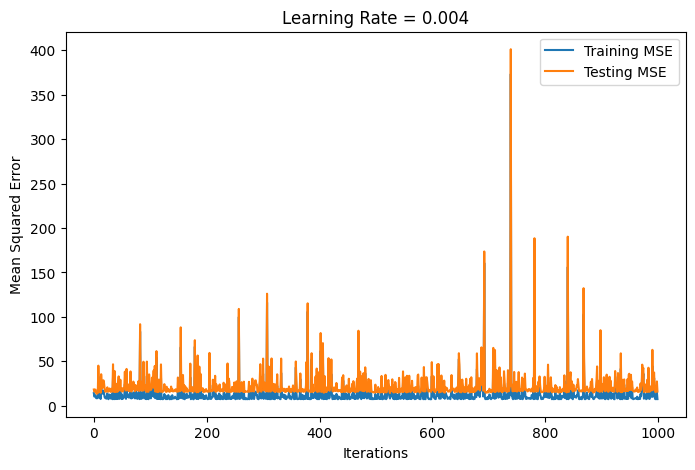

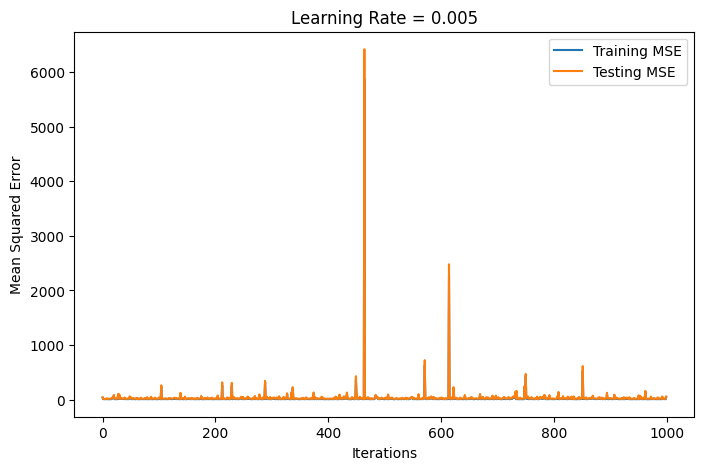

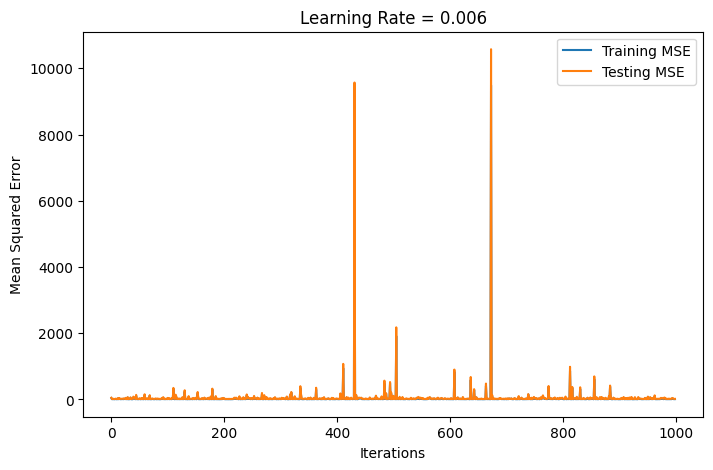

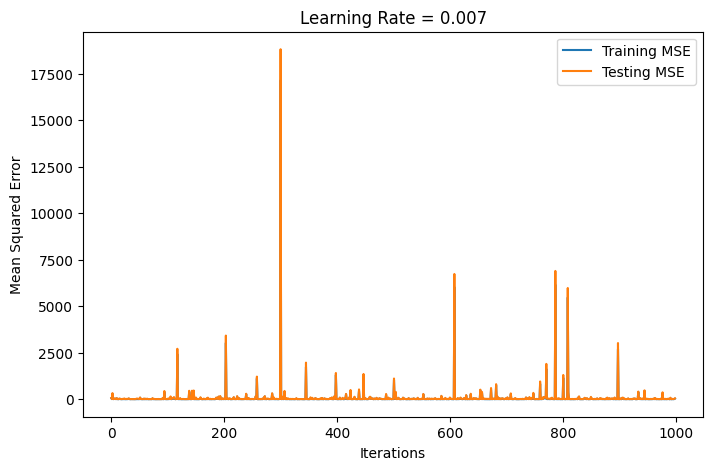

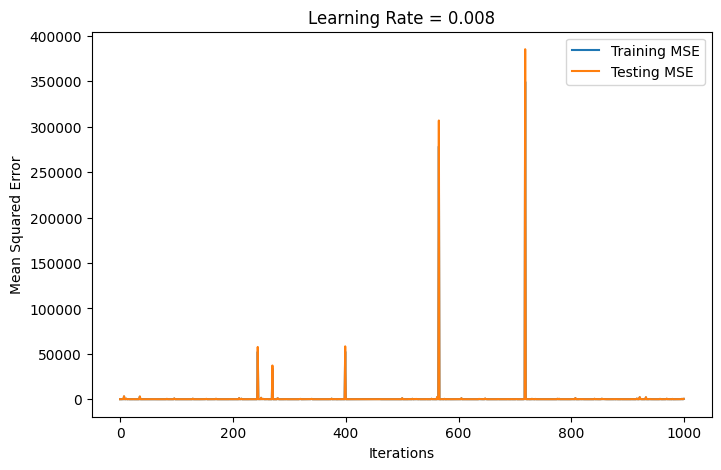

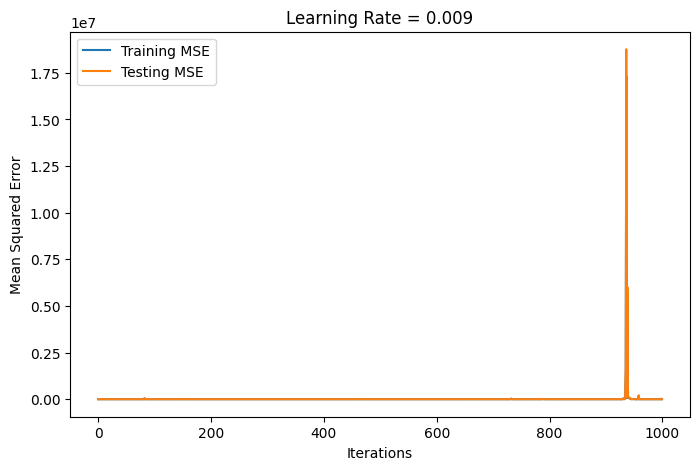

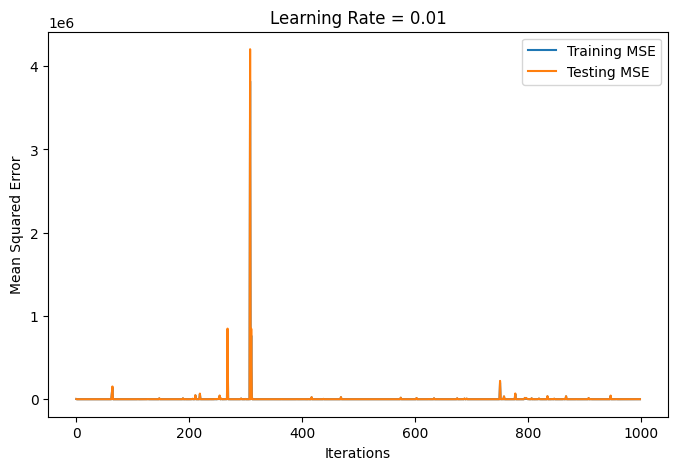

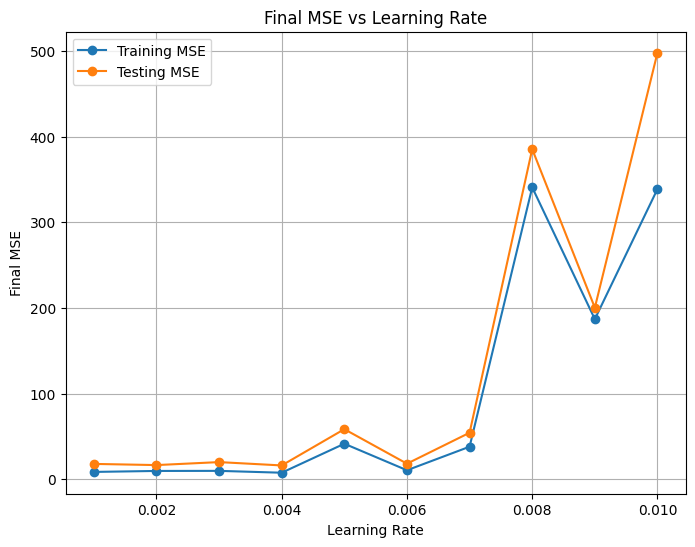

✅ Best Learning Rate: 0.004 with Testing MSE: 16.0141


In [ ]:
#SGD Algorithm
# try all learning rates and plot the MSE vs Iterations for each learning rate to find the best one

# Learning rates to test
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

# Store final MSE for comparison
final_mse_train = []
final_mse_test = []

# SGD Parameters
n_iterations = 1000  # Maximum number of iterations
cost_threshold = 1e-6  # Cost function threshold for early stopping
m = X_train.shape[0]  # Number of samples

# Loop over learning rates
for lr in learning_rates:
    # Initialize weights
    theta_sgd = np.random.randn(2, 1)
    
    # Lists to store MSE per iteration
    mse_train = []
    mse_test = []

    # SGD Loop
    for iteration in range(n_iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_train[random_index:random_index+1]
            yi = y_train[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta_sgd) - yi)
            theta_sgd = theta_sgd - lr * gradients

        # Calculate MSE for training and testing
        y_train_pred = X_train.dot(theta_sgd)
        y_test_pred = X_test.dot(theta_sgd)
        mse_current = np.mean((y_train - y_train_pred.flatten())**2)
        mse_train.append(mse_current)
        mse_test.append(np.mean((y_test - y_test_pred.flatten())**2))

        # 💡 Check for early stopping (cost function threshold)
        if iteration > 0 and abs(mse_train[-2] - mse_current) < cost_threshold:
            print(f"Early stopping at iteration {iteration} for learning rate {lr}")
            break

    # Store final MSE
    final_mse_train.append(mse_train[-1])
    final_mse_test.append(mse_test[-1])

    # Plot MSE vs Iterations for each learning rate
    plt.figure(figsize=(8, 5))
    plt.plot(mse_train, label='Training MSE')
    plt.plot(mse_test, label='Testing MSE')
    plt.title(f"Learning Rate = {lr}")
    plt.xlabel("Iterations")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.show()

# Plot Final MSE vs Learning Rate
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, final_mse_train, marker='o', label='Training MSE')
plt.plot(learning_rates, final_mse_test, marker='o', label='Testing MSE')
plt.title("Final MSE vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Final MSE")
plt.legend()
plt.grid(True)
plt.show()

# Identify the best learning rate (lowest test MSE)
best_lr_index = np.argmin(final_mse_test)
best_lr = learning_rates[best_lr_index]
print(f"✅ Best Learning Rate: {best_lr} with Testing MSE: {final_mse_test[best_lr_index]:.4f}")



SGD Observations 
- 

In [ ]:
# BGD Algorithm
